На основании модели Кронига-Пени промоделировать зонную структуру одномерного
кристалла.


Проанализировать изменение ширины запрещенных зон для двух крайних
случаев, когда электрон совершенно свободен и когда электрон заперт внутри одной
потенциальной ямы, т.е. стенки непроницаемы, а так же промежуточные случаи.

<p align="center">
    <img width="382" src="asset/a.png" alt="qr"/>
</p>

Где a – ширина ямы, b – ширина барьера, с – постоянная
кристаллической решетки, n ± 0, ± 1, ± 2...

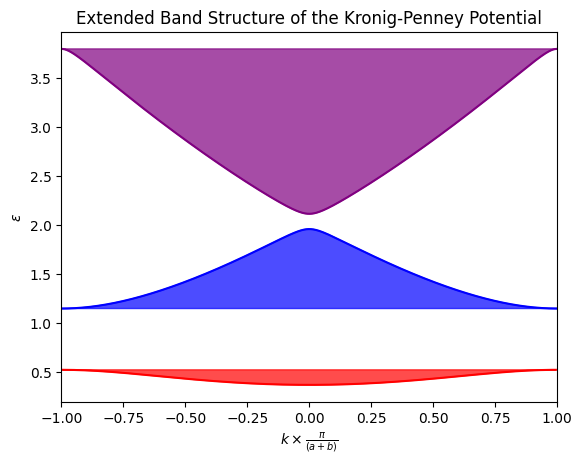

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.constants import hbar, m_e, eV


def compute_kronig_penney_solution(a, b, potential_height, energy_range):
    alpha_0 = (2 * m_e * potential_height * eV / (hbar ** 2)) ** (1/2)
    a0 = a * 1e-10
    b0 = b * 1e-10

    def kronig_penney_above_one(energy):
        return (1 - 2 * energy) / (2 * (energy * (energy - 1)) ** (1/2)) * \
               np.sin(alpha_0 * a0 * energy ** (1/2)) * \
               np.sin(alpha_0 * b0 * (energy - 1) ** (1/2)) + \
               np.cos(alpha_0 * a0 * energy ** (1/2)) * \
               np.cos(alpha_0 * b0 * (energy - 1) ** (1/2))

    def kronig_penney_below_one(energy):
        return (1 - 2 * energy) / (2 * (energy * (1 - energy)) ** (1/2)) * \
               np.sin(alpha_0 * a0 * energy ** (1/2)) * \
               np.sinh(alpha_0 * b0 * (1 - energy) ** (1/2)) + \
               np.cos(alpha_0 * a0 * energy ** (1/2)) * \
               np.cosh(alpha_0 * b0 * (1 - energy) ** (1/2))

    energy_values = np.linspace(1e-10, energy_range, 200000)
    function_values = np.piecewise(energy_values,
                                   [energy_values < 1, energy_values > 1],
                                   [kronig_penney_below_one, kronig_penney_above_one])

    return energy_values, function_values


def calculate_energy_bands(energy_values, function_values, extend_repeats=2):
    k_values = []
    band_list = []
    energy_band_list = []
    temporary_energy_values = []

    for i in range(len(function_values) - 1):
        if 1 >= function_values[i] >= -1:
            band_list.append(function_values[i])
            temporary_energy_values.append(energy_values[i])
            if (1 < function_values[i + 1] or -1 > function_values[i + 1]):
                k_values.append(band_list)
                energy_band_list.append(temporary_energy_values)
                band_list = []
                temporary_energy_values = []

    for i, band in enumerate(k_values):
        k_values[i] = np.arccos(band) / np.pi
        if i % 2 == 0:
            energy_band_list[i] = np.concatenate((energy_band_list[i][::-1], energy_band_list[i][::1]))
            k_values[i] = np.concatenate((-1 * np.array(k_values[i], dtype=float)[::-1], k_values[i][::1]))
        else:
            k_values[i] = np.concatenate((k_values[i][::1], -1 * np.array(k_values[i], dtype=float)[::-1]))
            energy_band_list[i] = np.concatenate((energy_band_list[i][::1], energy_band_list[i][::-1]))

    extended_k = []
    extended_eps = []
    for k, eps in zip(k_values, energy_band_list):
        for n in range(-extend_repeats, extend_repeats + 1):
            if n != 0:
                extended_k.append(k + 2 * n)
                extended_eps.append(eps)

    extended_k = k_values + extended_k
    extended_eps = energy_band_list + extended_eps

    return extended_k, extended_eps


a = 5
b = 5
potential_height = 1
energy_range = 6

energy_values, function_values = compute_kronig_penney_solution(a, b, potential_height, energy_range)
k_values, energy_bands = calculate_energy_bands(energy_values, function_values, extend_repeats=2)

colors = ['red', 'blue', 'purple', 'orange']

plt.figure()
plt.title("Extended Band Structure of the Kronig-Penney Potential")
plt.xlabel(r"$k \times \frac{\pi}{(a+b)}$")
plt.ylabel(r"$\epsilon$")

for i, (ki, epsi) in enumerate(zip(k_values, energy_bands)):
    plt.plot(ki, epsi, color=colors[i % len(colors)])
    plt.fill(ki, epsi, color=colors[i % len(colors)], alpha=0.7)
plt.xlim(-1, 1)
plt.show()